# Comparativa final de los modelos entrenados


In [1]:
import sys

sys.path.append("../")  # Add the parent directory to the Python path

In [2]:
from src.data.data_loader import data_loader_test
from src.config import CLASS_NAMES
from src.visualization.plot_results import plot_model_metrics
from src.visualization.results_table import get_results_table

### Rendimiento de los modelos por clase

En este notebook se compararán los distintos modelos y sus resultados sobre el mismo test de entrenamiento. El objetivo es medir el rendimiento por clase de cada uno de ellos.


In [3]:
test_data = data_loader_test("../data/test", (150, 150))

Found 4257 files belonging to 6 classes.


In [4]:
base_route = "../models"


MODEL_ROUTES = {
    "Simple": f"{base_route}/simple-overfit",
    "Aumentado": f"{base_route}/aumented",
    "Aumentado optimizado": f"{base_route}/aumented_tuned_trained",
    "Custom Xception": f"{base_route}/xception_finetuned",
    "Custom Xception Image Augmentation": f"{base_route}/xception_finetuned_augmented",
}

Se ha creado la función `plot_model_metrics`, que es una función agnostica a qué se está clasificando. </br>
Sirve para generar una gráfica que muestra las métricas de precisión por clase para n modelos exportados. Esta función requiere los siguientes parámetros:

#### Parámetros

- `test_data`: Los datos de prueba utilizados para la evaluación de los modelos.
- `class_names` (lista de cadenas): Una lista de nombres de clases para las cuales se calcularán las métricas de precisión.
- `models` (diccionario): Un diccionario donde las claves son los nombres de los modelos y los valores son las rutas a los modelos exportados.


134/134 [==============================] - 65s 480ms/step


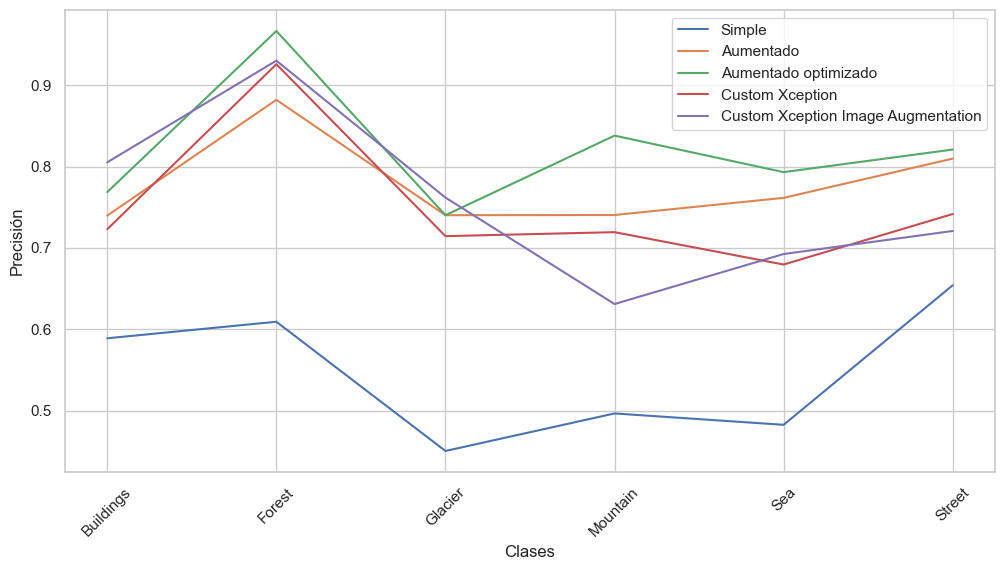

In [5]:
plot_model_metrics(test_data, models=MODEL_ROUTES, class_names=CLASS_NAMES)

In [7]:
table = get_results_table(test_data, models=MODEL_ROUTES)

134/134 [==============================] - 73s 538ms/step - loss: 0.6674 - accuracy: 0.7541


In [8]:
print(table)

+------------------------------------+--------------------+
|             Model Name             |    Metric Value    |
+------------------------------------+--------------------+
|               Simple               | 0.5454545617103577 |
|             Aumentado              | 0.778247594833374  |
|        Aumentado optimizado        | 0.8207657933235168 |
|          Custom Xception           | 0.7495889067649841 |
| Custom Xception Image Augmentation | 0.7540521621704102 |
+------------------------------------+--------------------+


### Análisis de resultados

De la gráfica se infiere que el mejor modelo es el Aumentado Optimizado, seguido del modelo basado en Xception con imágenes aumentadas.<br>

Como se ha dicho en los notebooks anteriores, Xception es un modelo mucho más grande que el modelo optimizado implementado. Esto implica que para entrenarlo correctamente se necesita un número de epochs superior, además de descongelar más capas. Ninguna de estas dos opciones es viable en este momento con el equipo del que se dispone.</br>

Por este motivo se concluye que el mejor modelo obtenido es el `Aumentado Optimizado`, aunque `Xception con image augmentation` es el que tiene el potencial de rendir mejor tras ciertos cambios.
